# Challenge Set 2:  Pandas (movies data)


**Topic**: Pandas (Exploring and visualizing our scraped movie data in pandas)

Just getting started? Read this guide: [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)

**Data**: Your own data! But: if you don't have movie data to work on yet, you can use some data on the top grossing 100 movies from 2013, scraped from Box Office Mojo: `2013_movies.csv`



#### Exercise 2.1
Plot domestic total gross over time.

In [298]:
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv('2013_movies.txt') 
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00


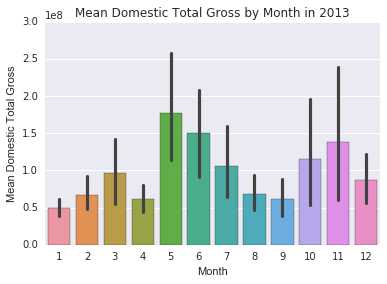

In [290]:
# movie_df[['Budget','DomesticTotalGross','Runtime']] = movie_df[['Budget','DomesticTotalGross','Runtime']].apply(pd.to_numeric)
# movie_df[['ReleaseDate']] = movie_df[['ReleaseDate']].apply(pd.to_datetime)
# movie_df = movie_df.sort_values('ReleaseDate')
# movie_df['month'] = movie_df['ReleaseDate'].dt.month

# #plot = sns.barplot(x="month", y="DomesticTotalGross", data=movie_df)
# #plot.set_title('Mean Domestic Total Gross by Month in 2013')
# #plot.set_ylabel('Mean Domestic Total Gross')
# #plot.set_xlabel('Month');

In [299]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], infer_datetime_format=True)
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14


In [300]:
df.sort_values('ReleaseDate', inplace=True)
df.dropna(inplace=True)

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 76 to 23
Data columns (total 7 columns):
Title                 87 non-null object
Budget                87 non-null float64
DomesticTotalGross    87 non-null int64
Director              87 non-null object
Rating                87 non-null object
Runtime               87 non-null int64
ReleaseDate           87 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.4+ KB


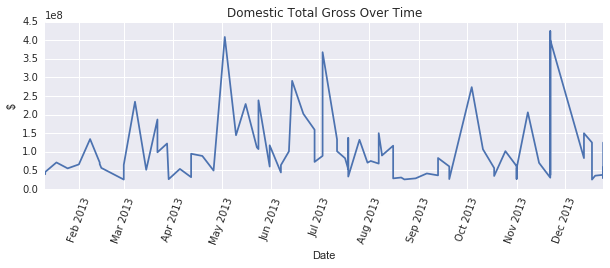

In [302]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.figure(figsize=(10,3))

release_dates = df["ReleaseDate"]
domestic_total_gross = df["DomesticTotalGross"]

plt.xticks(rotation=70)
plt.plot(release_dates, domestic_total_gross)
plt.title('Domestic Total Gross Over Time')
plt.xlabel('Date')
plt.ylabel('$')
plt.show()

#### Exercise 2.2

Plot runtime vs. domestic total gross.

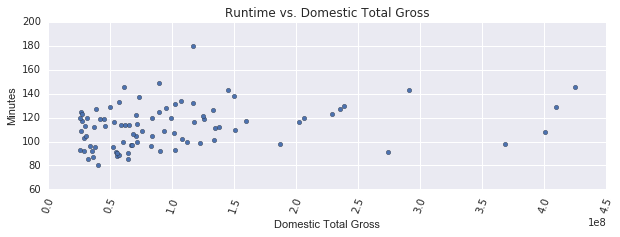

In [303]:
plt.figure(figsize=(10,3))

plot_runtime = df["Runtime"]
domestic_total_gross = df["DomesticTotalGross"]

plt.xticks(rotation=70)
plt.scatter(domestic_total_gross,plot_runtime)
plt.title('Runtime vs. Domestic Total Gross')
plt.xlabel('Domestic Total Gross')
plt.ylabel('Minutes')
plt.show()

#### Exercise 2.3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [304]:
df.groupby('Rating')[['DomesticTotalGross','Runtime']].mean().reset_index()

,Rating,DomesticTotalGross,Runtime
0,PG,1.319459e+08,100.285714
1,PG-13,1.177266e+08,117.350000
2,R,7.422795e+07,111.939394


In [305]:
grouped_object = df.groupby('Rating')[['DomesticTotalGross','Runtime']].mean()
grouped_object

,DomesticTotalGross,Runtime
Rating,,
PG,1.319459e+08,100.285714
PG-13,1.177266e+08,117.350000
R,7.422795e+07,111.939394


In [306]:
df.ix[60]

Title                 Escape From Planet Earth
Budget                                   4e+07
DomesticTotalGross                    57012977
Director                           Cal Brunker
Rating                                      PG
Runtime                                     89
ReleaseDate                2013-02-15 00:00:00
Name: 60, dtype: object

In [307]:
df.ix[9]

Title                 Oz The Great and Powerful
Budget                                 2.15e+08
DomesticTotalGross                    234911825
Director                              Sam Raimi
Rating                                       PG
Runtime                                     127
ReleaseDate                 2013-03-08 00:00:00
Name: 9, dtype: object

In [308]:
# merge does something interesting 
from pandas import DataFrame
df1 = DataFrame.merge(grouped_object,df, how='inner', right_on='Rating', left_index=True, right_index=False,suffixes=('_copy', '_actual'), sort=False, indicator=False)
df1.head()

,DomesticTotalGross_copy,Runtime_copy,Title,Budget,DomesticTotalGross_actual,Director,Rating,Runtime_actual,ReleaseDate
60,1.319459e+08,100.285714,Escape From Planet Earth,40000000.0,57012977,Cal Brunker,PG,89,2013-02-15
9,1.319459e+08,100.285714,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,2013-03-08
13,1.319459e+08,100.285714,The Croods,135000000.0,187168425,Kirk De MiccoChris Sanders,PG,98,2013-03-22
30,1.319459e+08,100.285714,Epic,100000000.0,107518682,Chris Wedge,PG,102,2013-05-24
3,1.319459e+08,100.285714,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03


#### Exercise 2.4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

In [309]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

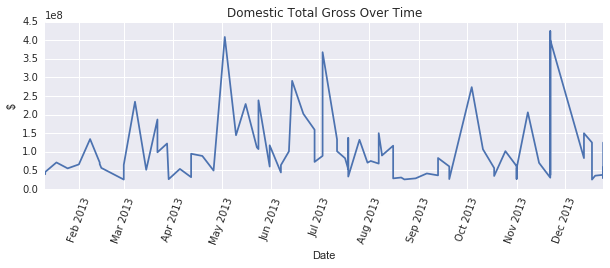

In [310]:
plt.figure(figsize=(10,3))

release_dates = df["ReleaseDate"]
domestic_total_gross = df["DomesticTotalGross"]

plt.xticks(rotation=70)
plt.plot(release_dates, domestic_total_gross)
plt.title('Domestic Total Gross Over Time')
plt.xlabel('Date')
plt.ylabel('$')
plt.show()

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 76 to 23
Data columns (total 7 columns):
Title                 87 non-null object
Budget                87 non-null float64
DomesticTotalGross    87 non-null int64
Director              87 non-null object
Rating                87 non-null object
Runtime               87 non-null int64
ReleaseDate           87 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.4+ KB


In [312]:
#df.set_index('ReleaseDate',inplace=True)
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11
70,Gangster Squad,60000000.0,46000903,Ruben Fleischer,R,113,2013-01-11
46,Mama,15000000.0,71628180,Andres Muschietti,PG-13,100,2013-01-18
63,Hansel and Gretel: Witch Hunters,50000000.0,55703475,Tommy Wirkola,R,88,2013-01-25
52,Warm Bodies,35000000.0,66380662,Jonathan Levine,PG-13,97,2013-02-01


In [313]:
pd.pivot_table(df.reset_index(),index='ReleaseDate',columns='Rating',values='DomesticTotalGross')

Rating,PG,PG-13,R
ReleaseDate,,,
2013-01-11,NaN,NaN,43021293.0
2013-01-18,NaN,71628180.0,NaN
2013-01-25,NaN,NaN,55703475.0
2013-02-01,NaN,66380662.0,NaN
2013-02-08,NaN,NaN,134506920.0
2013-02-14,NaN,71349120.0,67349198.0
2013-02-15,57012977.0,NaN,NaN
2013-03-01,NaN,65187603.0,25682380.0
2013-03-08,234911825.0,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11e20d910>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11d657c10>], dtype=object)

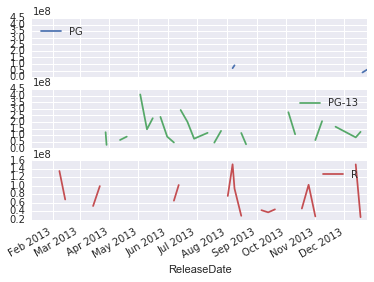

In [314]:
pd.pivot_table(df.reset_index(),index='ReleaseDate',columns='Rating',values='DomesticTotalGross').plot(subplots=True)

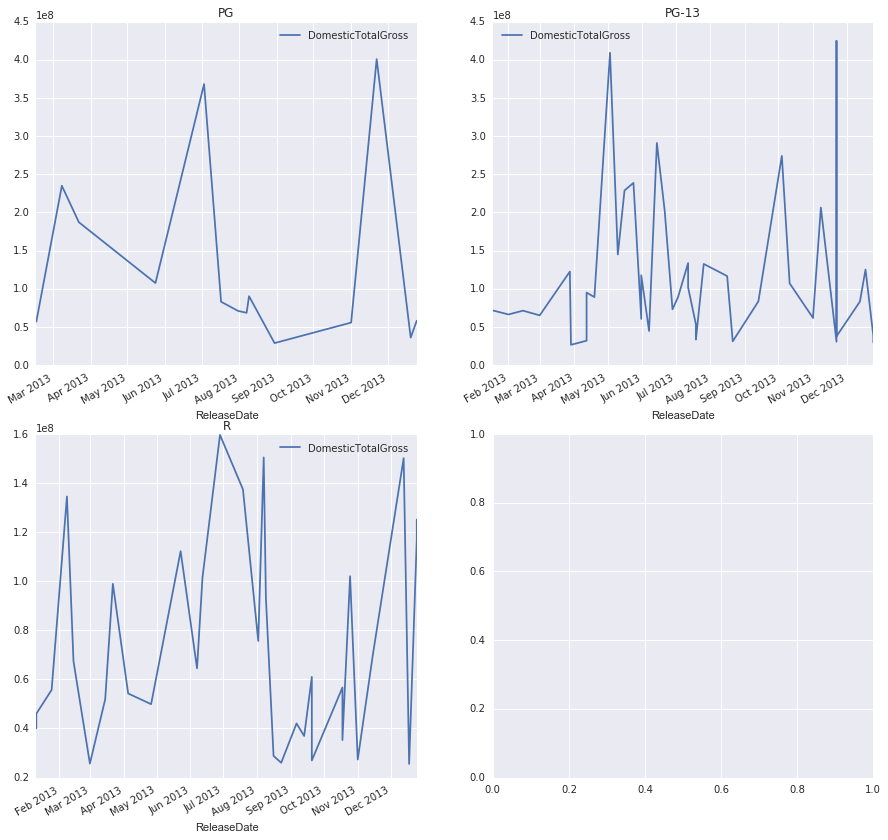

In [316]:
# another way of doing this that might be easier and more configurable 

import pandas as pd
import csv   
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

grouped = df.reset_index().groupby('Rating')

nrows = int(math.ceil(len(grouped)/2.))

#Setup Subplots
fig, axs = plt.subplots(nrows,2) # assuming we want two columns
#print zip(grouped,list(axs.flat))[0]

for (i,j), ax in zip(grouped, axs.flat):
    j.plot(x='ReleaseDate',y='DomesticTotalGross', ax=ax,title='{0}'.format(i))

#fig.subplots_adjust(hspace=1)
fig.set_figheight(15)
fig.set_figwidth(15)
        


#### Exercise 2.5

What director in your dataset has the highest gross per movie?

In [319]:
df['Month'] = df['ReleaseDate'].dt.month
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Month
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11,1
70,Gangster Squad,60000000.0,46000903,Ruben Fleischer,R,113,2013-01-11,1
46,Mama,15000000.0,71628180,Andres Muschietti,PG-13,100,2013-01-18,1
63,Hansel and Gretel: Witch Hunters,50000000.0,55703475,Tommy Wirkola,R,88,2013-01-25,1
52,Warm Bodies,35000000.0,66380662,Jonathan Levine,PG-13,97,2013-02-01,2


In [320]:
df.loc[df['DomesticTotalGross'].idxmax(),'Director'] # this guy 

'Francis Lawrence'

#### Exercise 2.6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month.  Error bars will represent the standard error of the mean.

Title of graph should include:  Mean Domestic Total Gross by Month in 2013

Topic for consideration:  what is the correct formula for the standard error of the mean?  Examine the error bars and see if they are "reasonable."

In [321]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Month
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11,1
70,Gangster Squad,60000000.0,46000903,Ruben Fleischer,R,113,2013-01-11,1
46,Mama,15000000.0,71628180,Andres Muschietti,PG-13,100,2013-01-18,1
63,Hansel and Gretel: Witch Hunters,50000000.0,55703475,Tommy Wirkola,R,88,2013-01-25,1
52,Warm Bodies,35000000.0,66380662,Jonathan Levine,PG-13,97,2013-02-01,2


In [322]:
df.groupby('Month')['DomesticTotalGross'].mean()

Month
1      53343560
2      79319775
3     101612314
4      64051676
5     177409720
6     133815326
7     120371913
8      70937668
9      50096063
10    115027038
11    137936759
12     78863499
Name: DomesticTotalGross, dtype: int64

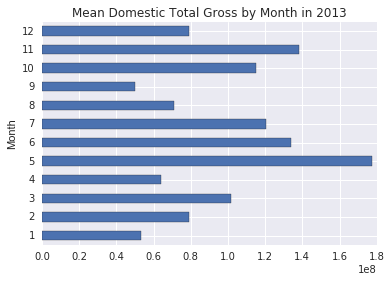

In [323]:
df.groupby('Month')['DomesticTotalGross'].mean().plot('barh')
plt.title('Mean Domestic Total Gross by Month in 2013')

In [326]:
df2 = df.groupby('Month')[['DomesticTotalGross']].mean()
df2.reset_index(inplace=True)
df2.head()

,Month,DomesticTotalGross
0,1,53343560
1,2,79319775
2,3,101612314
3,4,64051676
4,5,177409720


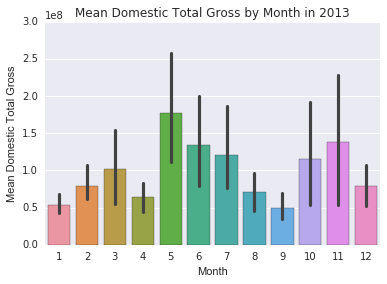

In [327]:
plot = sns.barplot(x="Month", y="DomesticTotalGross", data=df)
plot.set_title('Mean Domestic Total Gross by Month in 2013')
plot.set_ylabel('Mean Domestic Total Gross')
plot.set_xlabel('Month')
plt.show()